# Datasets - daar begint alles mee!

In een typische organisatie moet je jouw datasets uit diverse bronnen halen, zoals een relational database, datawarehouse, Excel-sheets etc., vaak zelfs van diverse (organisatie)afdelingen en dan ordenen. Dat is heel, heel veel werk! In deze module werken we met min-of-meer kant-en-klare datasets.

In deze notebook zijn twee bekende datasets onderzocht: **Iris** dataset en **Boston houses** dataset. 

#### Wat ga je doen?
Doorloop en voeruit (*Run* of *Shift+Enter*) de Python voorbeelden. Daarna ga je de oefeningen doen, waarbij je gebruik maakt van de Python code met deze twee datasets.  Kijk niet te snel in de voorbeeldoplossingen notebook, maar probeer eerst alles zelf op te lossen.

---

In [8]:
# show version numbers of libraries

# Python -> use platform and sys modules
import platform, sys
print(f"Python: {platform.platform()}, version: {sys.version[0:6]}")

# data science libraries
import numpy as np
import pandas as pd
import seaborn as sns
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

# plotting library
import matplotlib as mp
print(f"matplotlib: {mp.__version__}")

# ML-models library
import sklearn as sk
print(f"scikit-learn: {sk.__version__}")

# statistics library
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")

Python: Windows-10-10.0.26100-SP0, version: 3.11.9
numpy: 2.3.4
pandas: 2.3.3
seaborn: 0.13.2
matplotlib: 3.10.7
scikit-learn: 1.7.2
statsmodels: 0.14.5


## Iris dataset

De Iris-dataset bestaat uit gevens over Irisbloemen.

Iris is een **multivariate** dataset bestaande uit 50 monsters van elk van de drie soorten iris (Iris setosa, Iris virginica en Iris versicolor).

Elk monster bevat vier kenmerken, namelijk lengte en breedte van kelk (*sepal*)- en bloem (*petal*) -bladen in centimeters.

Iris is een typische testcase voor **classificatie** van machine learning.

![iris_flowers.jpg](./images/iris_flowers.jpg)

Nu kijken we alleen naar enkele eigenschappen van de datasets.

Examples based upon "Hands-On Scikit-Learn for ML applications", Paper, 2020, Apress.

In [9]:
# libraries
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
# ML-model RandomForestClassifier komt later aan bod

In [10]:
# phase: loading and exploring a dataset

br = '\n'

# load iris dataset from scikit-learn datasets
iris = datasets.load_iris()
# print the datatype of the iris data object
print(f"type of iris data: {type(iris)}", br)
keys = iris.keys()  # get the keys
print (keys, br)

# get the shape of features and target
X = iris.data
y = iris.target
print ('features shape:', X.shape)
print ('target shape:', y.shape, br)

# show the names of features and target
features = iris.feature_names
targets = iris.target_names
print (f'feature set:{br}{features}{br}')
print (f'targets:{br}{targets}{br}')


# show partial description
print (iris.DESCR[525:900], br)

type of iris data: <class 'sklearn.utils._bunch.Bunch'> 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

features shape: (150, 4)
target shape: (150,) 

feature set:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

targets:
['setosa' 'versicolor' 'virginica']

             Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ======= 



In [11]:
# phase: modelling a dataset
# only investigate most important features

# specify ML model and train the ML model
# Note: all data in dataset is taken!
rnd_clf = RandomForestClassifier(random_state=0,
                                 n_estimators=100)
rnd_clf.fit(X, y)

# show feature importance
rnd_name = rnd_clf.__class__.__name__
feature_importances = rnd_clf.feature_importances_
importance = sorted(zip(feature_importances, features),
                    reverse=True)
print ('Most important features' + ' (' + rnd_name + '):')
[print (row) for _, row in enumerate(importance)]

Most important features (RandomForestClassifier):
(np.float64(0.46044473961715215), 'petal length (cm)')
(np.float64(0.42411626512710127), 'petal width (cm)')
(np.float64(0.09090795402103087), 'sepal length (cm)')
(np.float64(0.024531041234715757), 'sepal width (cm)')


[None, None, None, None]

In [12]:
# description of the Iris dataset
# A description is not always present in a dataset,
# but if it is, it is very useful.
# print(iris.DESCR)

# Boston houses dataset

De Boston house dataset bevat informatie die is verzameld door de US Census Service over huisvesting in de omgeving van Boston Mass. Het is verkregen uit het StatLib-archief en is in de literatuur uitgebreid gebruikt om algoritmen te benchmarken.

In de data-folder van de module staat een `housing.csv` met de data.

Het doel van de dataset is om te kijken of de prijs van een huis te voorspellen valt p grond van de bestaande gegevens. In deze notebook ga je alleen de gegevens bekijken! ML modellen komen later aan bod.


Example based upon *"Hands-On Machine Learning with Sci-kit-Learn, Keras & TensorFlow"*, Géron, 2nd edition, 2019, O'Reilly.

2022-10: Een derde editie is in de maak (gepland oktober 2022). Wacht er dus even op, als je er interesse in hebt. 

In [13]:
# phase: loading the dataset

# helper function: sometime it is helpfull
# to have a function, especially when OS-platform
# issues are important.
import os
def load_csv_pd_data(path, filename):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel csv-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [14]:
# load the housing csv-file
housing = load_csv_pd_data("./data", "housing.csv")
print(type(housing))

<class 'pandas.core.frame.DataFrame'>


In [15]:
# phase: explore the dataset

# print first 5 rows of the dataset 
# to explore attributes and structure of data
housing.head()

# each row represents one district, 
# 10 attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The `info()` method gives a quick description of the data:
- 20,640 instances - failry small by ML standards, but perfect to start!
- pay attention to `total_bedrooms` and `ocean_proximity`

In [17]:
# attribute `ocean-proximity` is probably categorical data.
# You can check it with `value_counts()` method, which gives you
# what categories exist and how many districts belong to each category.
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [18]:
# The `describe()` method gives you a summary of the numerical attributes,
# such as mean, median, minimum, maximum and standard deviation.
# The percentage values are the so-called `percentiles` values: 
# a `percentile` indicates the value below which a given percentage 
# of observations in a group of observations fall.
# pay attention to `total_bedrooms`
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


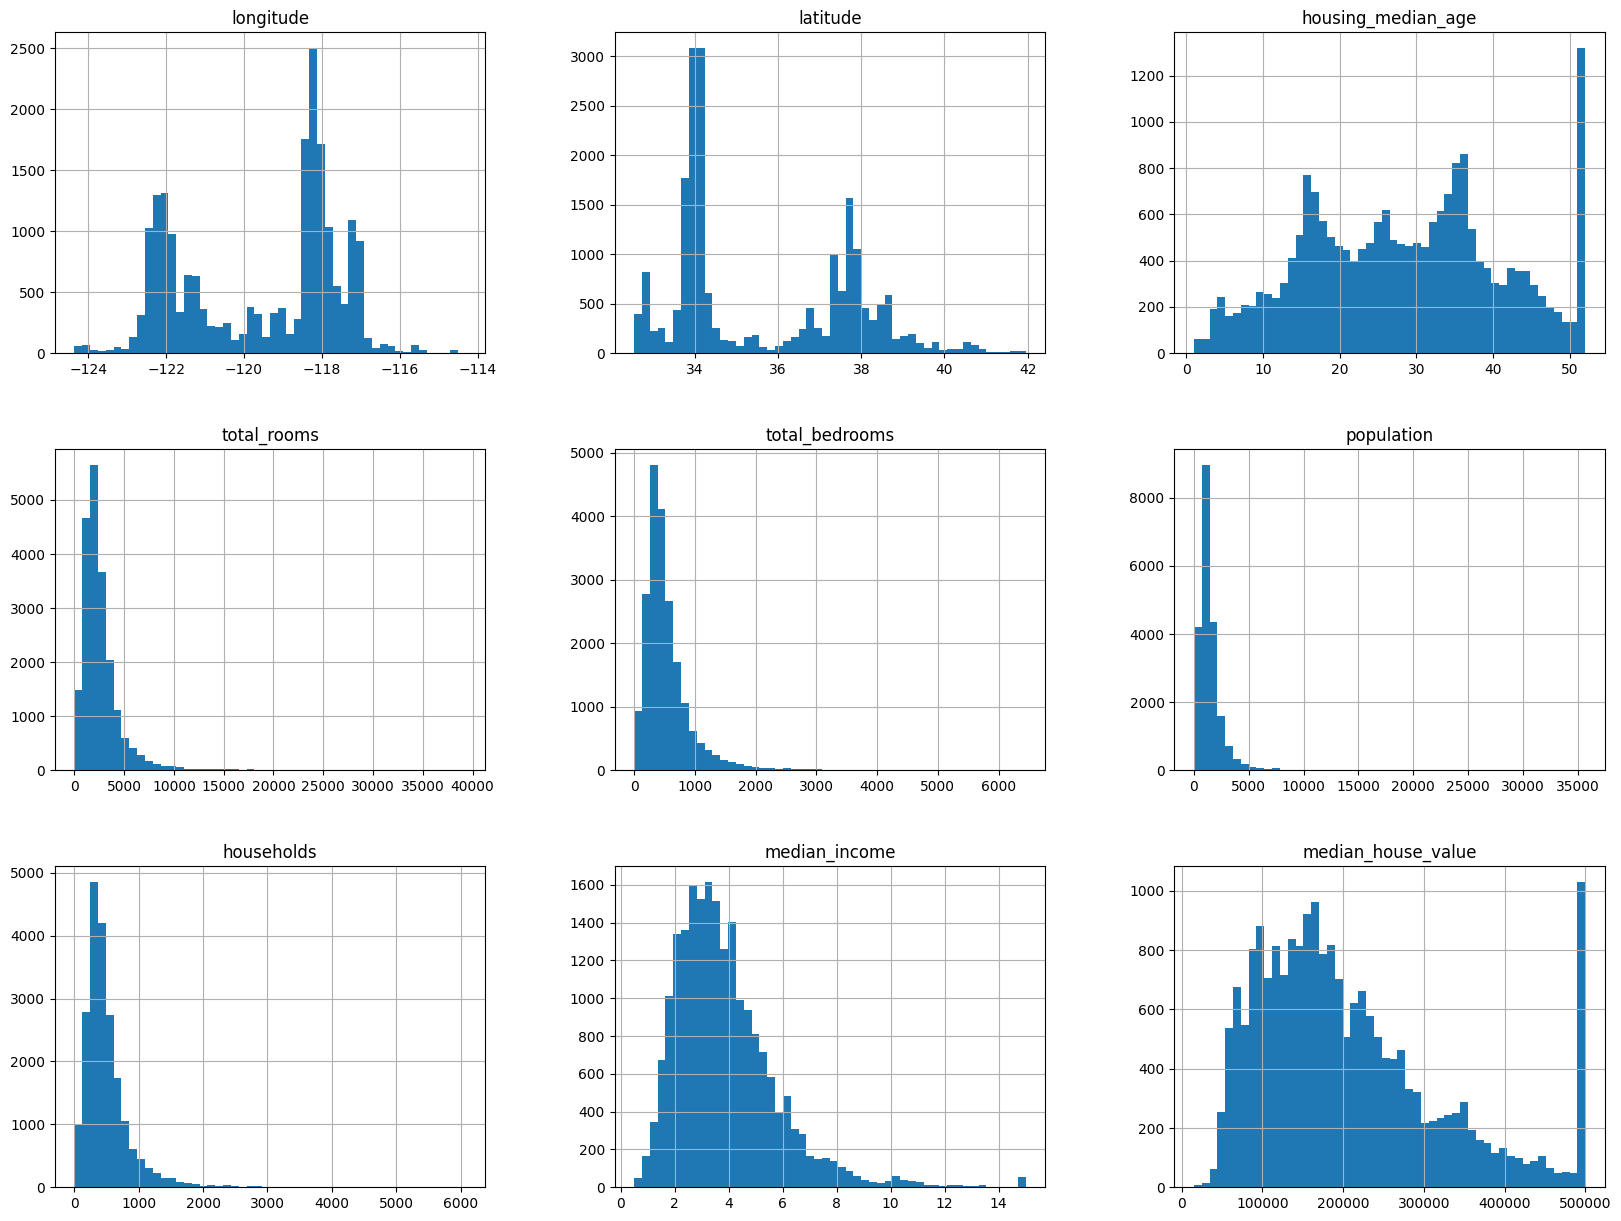

In [19]:
# a histogram for each attribute gives you 
# a quick impression of data distribution.
%matplotlib inline     
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show() 

Zoek naar eigenaardigheden op het histogram:

- `mediaan_income` ziet er niet uit alsof het wordt uitgedrukt in Amerikaanse dollars
> controleer bij het team dat de gegevens heeft verzameld wat ze hebben gedaan!
(Het blijkt: cijfers vertegenwoordigen ongeveer tienduizend dollars)
- 'housing_median_age' en 'median_house_value' waren ook geschaald en beperkt.
- attributen hebben zeer verschillende schalen.
- veel histogrammen vertonen een lange 'staart' ('scheve' histogrammen). Dit maakt het moeilijker voor ML-modellen om patronen te detecteren.

Deze bevindingen moeten worden aangepakt vóórdat de ML-modellen worden toegepast.

---
# 2. OEFENINGEN: 

## A. Bepaal de 6 belangrijkste attributen
NB. attributen worden ook wel `features` genoemd.

Datasets: `redwine` en/of `whitewin` uit `scikit-learn`.

Maak gebruik van de Python code waarmee de Iris dataset is onderzocht.

1. Inladen van de `redwine` of `whitewine` dataset uit scikit-learn.
2. Print de `keys` en de dimensie van `features` en `target`.
3. Print de namen van `features` en `target`.
3. Print de beschrijving van de dataset.
4. Specificeer model `RandomForestClassifier` (100 estimaters) en train dit model met de dataset.
5. Toon de 6 belangrijkste `features`.

## B. Onderzoek data uit CSV-bestanden met pandas `DataFrame`.

Datasets:  `bank.csv`, `redwine.csv` en/of `white.csv`.

Bekijk de datasets zoals de Boston `housing` dataset is bekeken:

1. Inladen van data uit een csv-bestand.
2. Print de eerste 10 rijen van de ingeladen data.
3. Print een korte beschrijving van de data. Check of er categorie data aanwezig is en zo ja, print van een of meer kolommen welke categoriën en hoeveel instances per categorie er zijn.
4. Print een samenvatting van de numerieke data (*descriptive statistics*)
5. Plot histogrammen van de attributes. Bekijk de histogrammen en bepaal welke 'klok'-vormig zijn (zgn. *normal data distribution* zijnde *Gaussian distribution*), of 'scheef' zijn.

---
## VOORBEELD OPLOSSING A voor een wijn dataset


In [ ]:
# hier komt jouw code


## VOORBEELD OPLOSSING B voor bank dataset

Dataset: `bank.csv`

De dataset `bank.csv` is samengesteld uit direct marketingcampagnes van een Portugese bankinstelling. De doelstelling wordt beschreven door of een cliënt inschrijft (ja/nee) op een termijndeposito (targetlabel y).
 
Het bestaat uit 41188 gegevenselementen met 20 features voor elk element.

In [ ]:
# hier komt jouw code...


---
## VOORBEELD OPLOSSING B voor de wijnen datasets

Dataset: `redwines.csv` en/of `whitewines.csv`

NB. Alle Python code in één cel is géén aanbevolen manier. Het maakt de code wat ingewikkelder met print-statements.
Code snippets zoals `wines.head()` en `wines.describe()` hebben een eigen cel nodig.

In [ ]:
# hier komt jouw code...


---
# EXTRA: Stapje verder...

Dataset: housing.csv

Wij, mensen, zijn erg goed in het zien van patronen in visualisaties. 

Als je de dataset van de Boston housing nader bekijkt, zie je geografische data staan. Dat roept vragen op die we in deze extra sectie uitwerken.

- Geven de geografische data ons meer inzicht in de data?
- De dataset bevat huizenprijzen. Geeft ons dat meer inzicht in de data met name als je die combineerd met de geografische data?

In [20]:
%matplotlib inline     
import matplotlib.pyplot as plt

# extra: increase font size for plots to make them prettier.
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# load the housing csv-file
housing = load_csv_pd_data("./data", "housing.csv")
print(type(housing))

<class 'pandas.core.frame.DataFrame'>


Aangezien de `housing` dataset geografische gegevens bevat (`longitude` en `latitude`) is het een goed idee om een scatterplot te maken van alle districten. 

<Axes: xlabel='longitude', ylabel='latitude'>

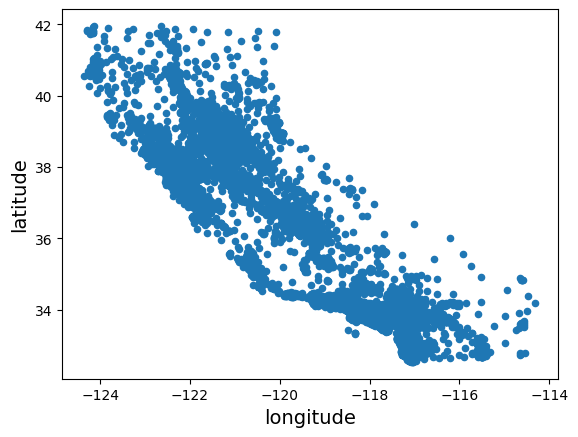

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

De figuur begint te lijken op California, maar er is nauwelijks een patroon te zien.
De parameter `alpha` van de `plot` methode biedt de mogelijkheid om een hoge dichtheid in de data te zien:

<Axes: xlabel='longitude', ylabel='latitude'>

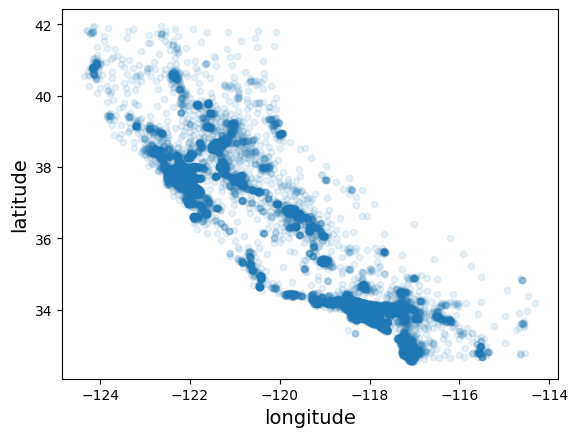

In [22]:
housing.plot(kind="scatter",
             x="longitude", y="latitude",
             alpha=0.1
            )

We zien nu hoge dichtheid in Bay Area, rondom Los Angelos en San Diego en een lange rij met vrij hoge dichtheid in the Central Valley  - als je de kaart van California ernaast zou leggen.

Nog interessanter wordt het als je de huizenprijzen gaat bekijken. In de volgende plot vertegenwoordigt straal van elke cirkel de bevolking van het district (parameter `s`) en de kleur vertegenwoordigt de prijs (parameter `c`).

Er is gebruik gemaakt van een vooraf gedefinieerde kleurenkaart, `jet` genaamd, die varieert van blauw (lage waarden) tot rood (hoge prijzen)

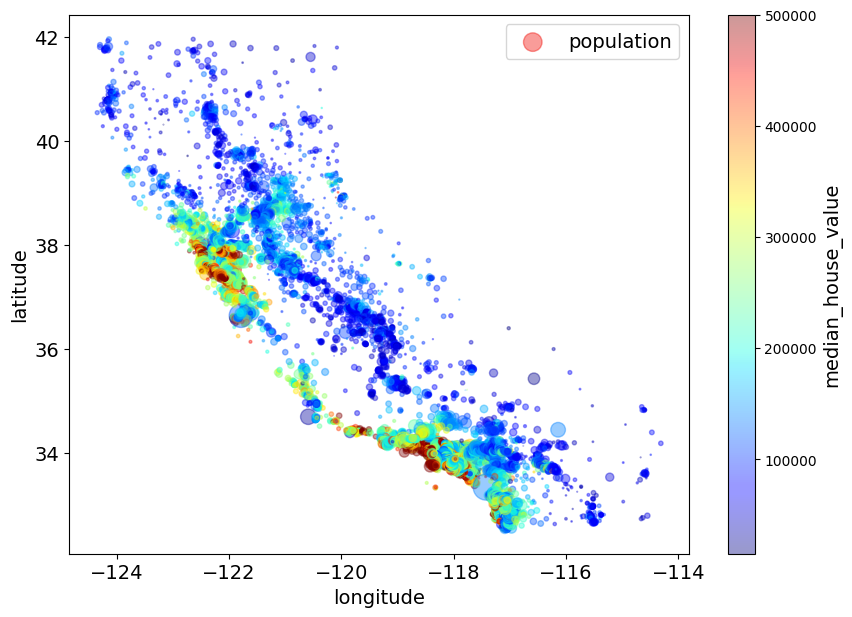

In [23]:
housing.plot(kind="scatter",
             x="longitude", y="latitude",
             s=housing["population"]/100,
             label="population",
             #c=housing["median_house_value"],
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True,
             alpha=0.4,
             figsize=(10,7),
             fontsize=14,
            )
plt.legend()
plt.show()

Deze afbeelding vertelt je dat de huizenprijzen sterk gerelateerd zijn aan de locatie (zoals dicht bij de oceaan) en aan de bevolkingsdichtheid, zoals je waarschijnlijk al wist.

Een clustering-algoritme zou nuttig moeten zijn voor het detecteren van het hoofdcluster en voor het toevoegen van nieuwe `features` die de nabijheid van de clustercentra meten.

De feature (attribute)`ocean proximity` kan ook nuttig zijn, hoewel in Noord-Californië de huizenprijzen in kustgebieden niet te hoog zijn, dus het is geen eenvoudige regel.

### Take aways
1. bekijk de attributen/features in de dataset goed en maak er gebruik van. Met name in de exploratieve fase: maak grafieken! Je krijgt gegarandeerd meer inzicht in de data.
2. Bekijk ook de argumenten van de methoden, zoals de `plot` methode en later ook de ML modellen. Experimenteer ermee!

---

### Opdrachten

1. inladen datafile `heights.csv` van folder `data` met pandas library.

2. Histogrammen zijn belangrijke tools in het verkennen van data distributies (i.e. de verdeling van data). Maak histogrammen van `Father` en `Son` kolommen met behulp van plot-functions uit `pandas` en `seaborn`:
> - using pandas `DataFrame.hist()` function. Zorg voor een legende.
> - using pandas `DataFrame.plot.hist()` function.
> - using Seaborn `displot()` en/of`histplot` function. Maak gebruik van Seaborn's [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html) documentatie. Zet een titel in de histogram met de volgende code: `g.set_titles(col_template='{col_name}')`.

3. maak een scatterplot van de `height` dataframe, met behulp van Seaborn's `scatterplot()` function. 

Experimenteer met parameters van de plot-functies voor hun effect op de grafiek.

In [24]:
# hier komt jouw code...
